In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# initialization
g = 9.8
vt = 40.00 # trim velocity
CD = 1/40 # drag coefficient
CL = 1 # lift coefficient

# initial condition
v0 = vt # initial velocity
theta0 = 0 # initial angle
x0 = 0 # initial x-position
y0 = 2333 # initial y-position

In [14]:
def f(u):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    term1 = -g*math.sin(theta) - C_D/C_L*g/v_t**2*v**2
    term2 = -g*math.cos(theta)/v + g/v_t**2*v
    term3 = v*math.cos(theta)
    term4 = v*math.sin(theta)
    return numpy.array([term1,term2,term3,term4])

In [4]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

In [5]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    return u + dt * f(u, *args)

In [6]:
T = 100 # final time
dt = 0.1 # time step
N = int(T/dt) + 1 # number of time step

u = numpy.empty((N, 4)) # N by 4
u[0] = numpy.array([v0, theta0, x0, y0]) # assign the initial values

# solve it by Euler method
for n in range(N-1):
    u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

In [7]:
# get positions
x = u[:,2]
y = u[:,3]

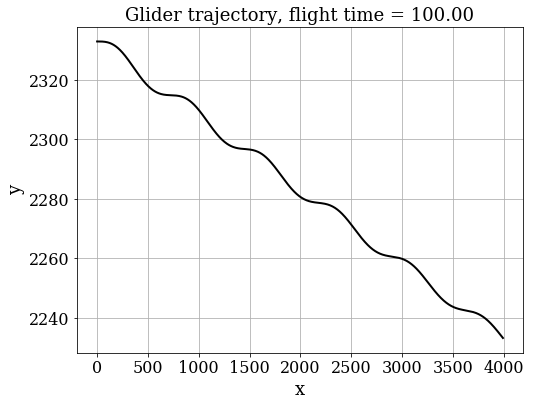

In [8]:
# plot it
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

## class

In [9]:
class ABC:
    def __init__(self):
        self.word = "Coool"
    def NotCool(self):
        self.word = "Not Coool"
    def NewWord(self, new_word):
        self.word = new_word

In [10]:
object_sample = ABC()
object_sample.word

'Coool'

In [11]:
object_sample.NotCool()
object_sample.word

'Not Coool'

In [12]:
object_sample.NewWord("Jesus")
object_sample.word

'Jesus'

## class over

## Grid convergence

In [13]:
# different grids
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# empty list for solutions
u_values = []

for dt in dt_values:
    N = int(T/dt) + 1
    u = numpy.empty((N,4)) # N by 4 empty array
    u[0] = numpy.array([v0, theta0, x0, y0]) # initial conditions
    for n in range(N-1):
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u)

In [15]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    # u_fine[::ration] means it takes sample from it begin to
    # the end, seperated by ratio
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [16]:
# computing error down below
diff_values = []

# from dt_values first to last
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

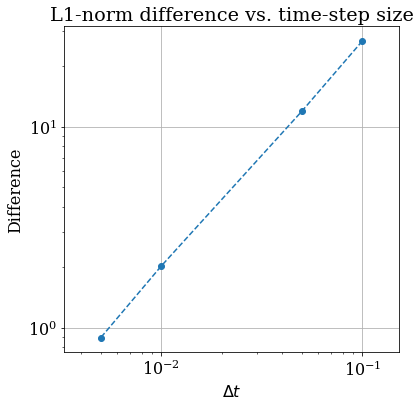

In [17]:
# plot:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

## Order of convergence